## Homework 3 Coding Exercises

In [2]:
import numpy as np
import numpy.random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## 5).
We consider the perfect noisy integrate and fire (PIF) model to numerically analyze the results from question 3.

### a).
We compare our analytic mean spike time $\mu(\theta)$ to numerically estimated values.

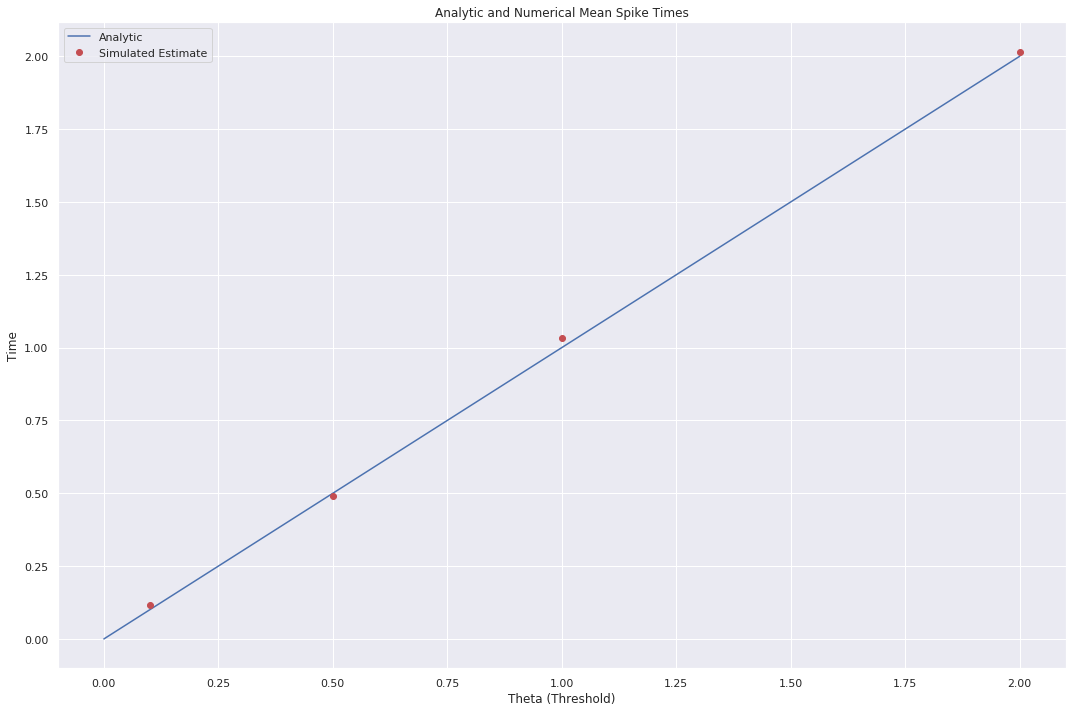

In [5]:
#Plotting analytic function
theta_range = np.linspace(0,2,1000) #Theta range

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.plot(theta_range, theta_range) #Plotting analytic mean spike time (Linear)

#Numerically Estimating

N = 1000 #Number of spikes to generate
theta_vec = [0.1, 0.5, 1, 2] #Theta values to simulate

I = 1
s = 1      # noise standard deviation NOTE: Not using this
dt = 0.001   # time step
isi = np.zeros(N)   # initialize vector of spike times (ms)

for theta in theta_vec:
    for j in np.arange(N):
        u=0
        t=0
        while u<theta:
            u = u + dt*I + np.sqrt(2*dt)*rnd.randn();
            t=t+dt
        isi[j-1]=t
            
    #Calculate the mean and plot
    mean = np.mean(isi)
    
    ax.plot(theta, mean, 'ro')
    
#Plotting
ax.set_title('Analytic and Numerical Mean Spike Times')
ax.set_xlabel('Theta (Threshold)')
ax.set_ylabel('Time')
ax.legend(['Analytic', 'Simulated Estimate'])
plt.tight_layout()

We can see that our numerical results match excelently well with our analytic function. This implies that results from question 3 are accurate.

### b).
We compare our analytic spike time variance $\sigma(\theta)$ to numerically estimated values.

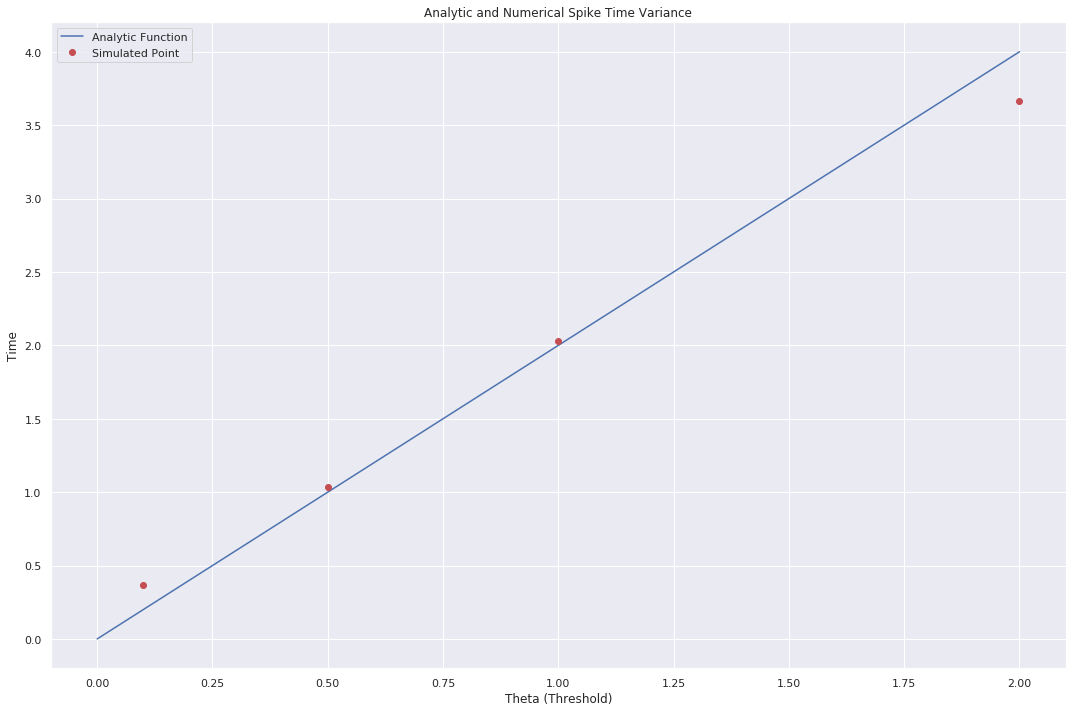

In [7]:
#Plotting analytic function
theta_range = np.linspace(0,2,1000) #Theta range

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.plot(theta_range, 2*theta_range) #Plotting analytic spike time variance (Linear)

#Numerically Estimating

N = 1000 #Number of spikes to generate
theta_vec = [0.1, 0.5, 1, 2] #Theta values to simulate

I = 1
s = 1      # noise standard deviation NOTE: Not using this
dt = 0.001   # time step
isi = np.zeros(N)   # initialize vector of spike times (ms)

for theta in theta_vec:
    for j in np.arange(N):
        u=0
        t=0
        while u<theta:
            u =u + dt*I + np.sqrt(2*dt)*rnd.randn();
            t=t+dt
        isi[j-1]=t
            
    #Calculate the mean and plot NOTE: Check this
    var = np.var(isi)
    
    ax.plot(theta, var, 'ro')
    
#Plotting
ax.set_title('Analytic and Numerical Spike Time Variance')
ax.set_xlabel('Theta (Threshold)')
ax.set_ylabel('Time')
ax.legend(['Analytic Function', 'Simulated Point'])
plt.tight_layout()

Again we see that our numerical results fit very well with the theory developed in question 3. However, in the plot above there does appear to be more error than for the mean spike time. This can be attributed to the random noise and machine error.

### c).
We compare our spike time gaussian distribution estimate to a numerically simulated spike time distribution.

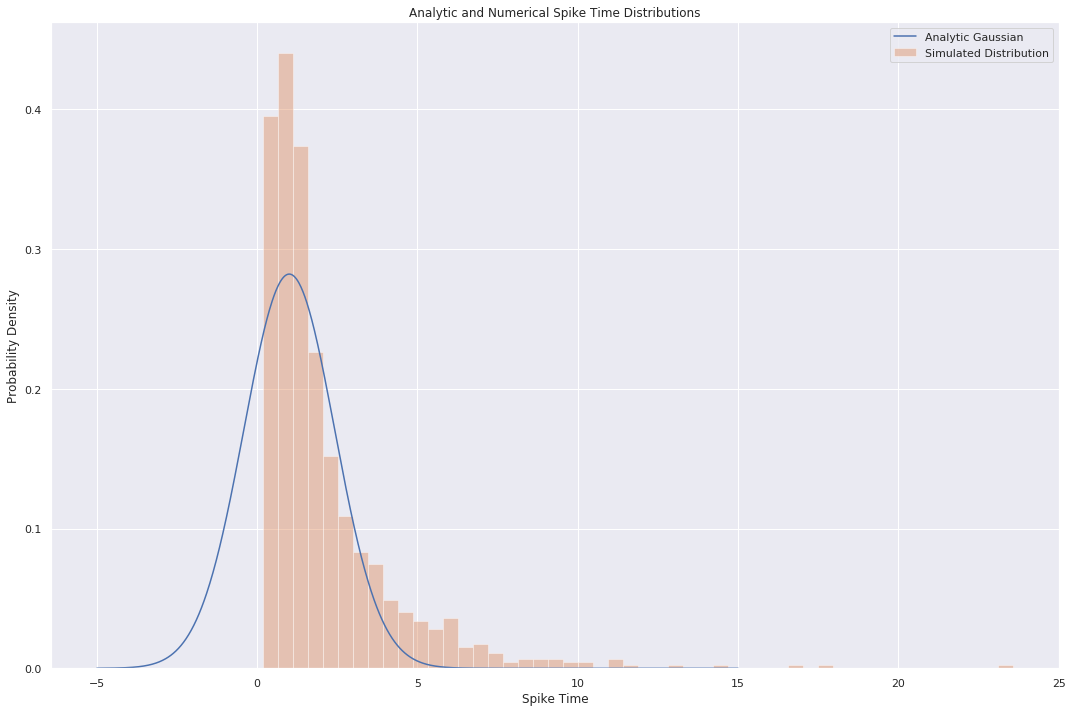

In [8]:
#Constant
theta_c = 1

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

#Plotting analytic distribution
def gaussian(time, theta):
    factor = (1/(2*np.sqrt(theta*np.pi)))
    
    arg = -1*((time-theta)**2/(4*theta))
    
    exp = np.exp(arg)
    
    return factor*exp

tvec = np.linspace(-5,15,1000) #Plotting range

axes.plot(tvec, gaussian(tvec, theta_c))

#Numerically Estimating

N = 1000 #Number of spikes to generate
theta_vec = [0.1, 0.5, 1, 2] #Theta values to simulate

I = 1
s = 0.1      # noise standard deviation NOTE: Not using this
dt = 0.01   # time step
isi = np.zeros(N)   # initialize vector of spike times (ms)

for j in np.arange(N):
    u=0
    t=0
    while u<theta:
        u =u + dt*I + np.sqrt(2*dt)*rnd.randn();
        t=t+dt
    isi[j-1]=t
    
sns.distplot(isi, ax=axes, kde=False, norm_hist=True)

axes.set_title('Analytic and Numerical Spike Time Distributions')
axes.set_xlabel('Spike Time')
axes.set_ylabel('Probability Density')
axes.legend(['Analytic Gaussian','Simulated Distribution'])
plt.tight_layout()

We can see that there are a few aspects of the plot above that show significant deviation between the model and the numerical estimate. Most notably perhaps, is the lack of any simulated spike times less than zero while the gaussian certainly takes on these negative values. This makes sense because in reality we do not expect spike times to be negative, but the gaussian approximation doesn't account for this. This is most likely the cause of the increased amplitude near the mean for the gaussian, as the numerical simulation will have more values above zero.

## 6).
We examine how more samples help to inform a Bayesian posterior over possible Poisson Process rates.

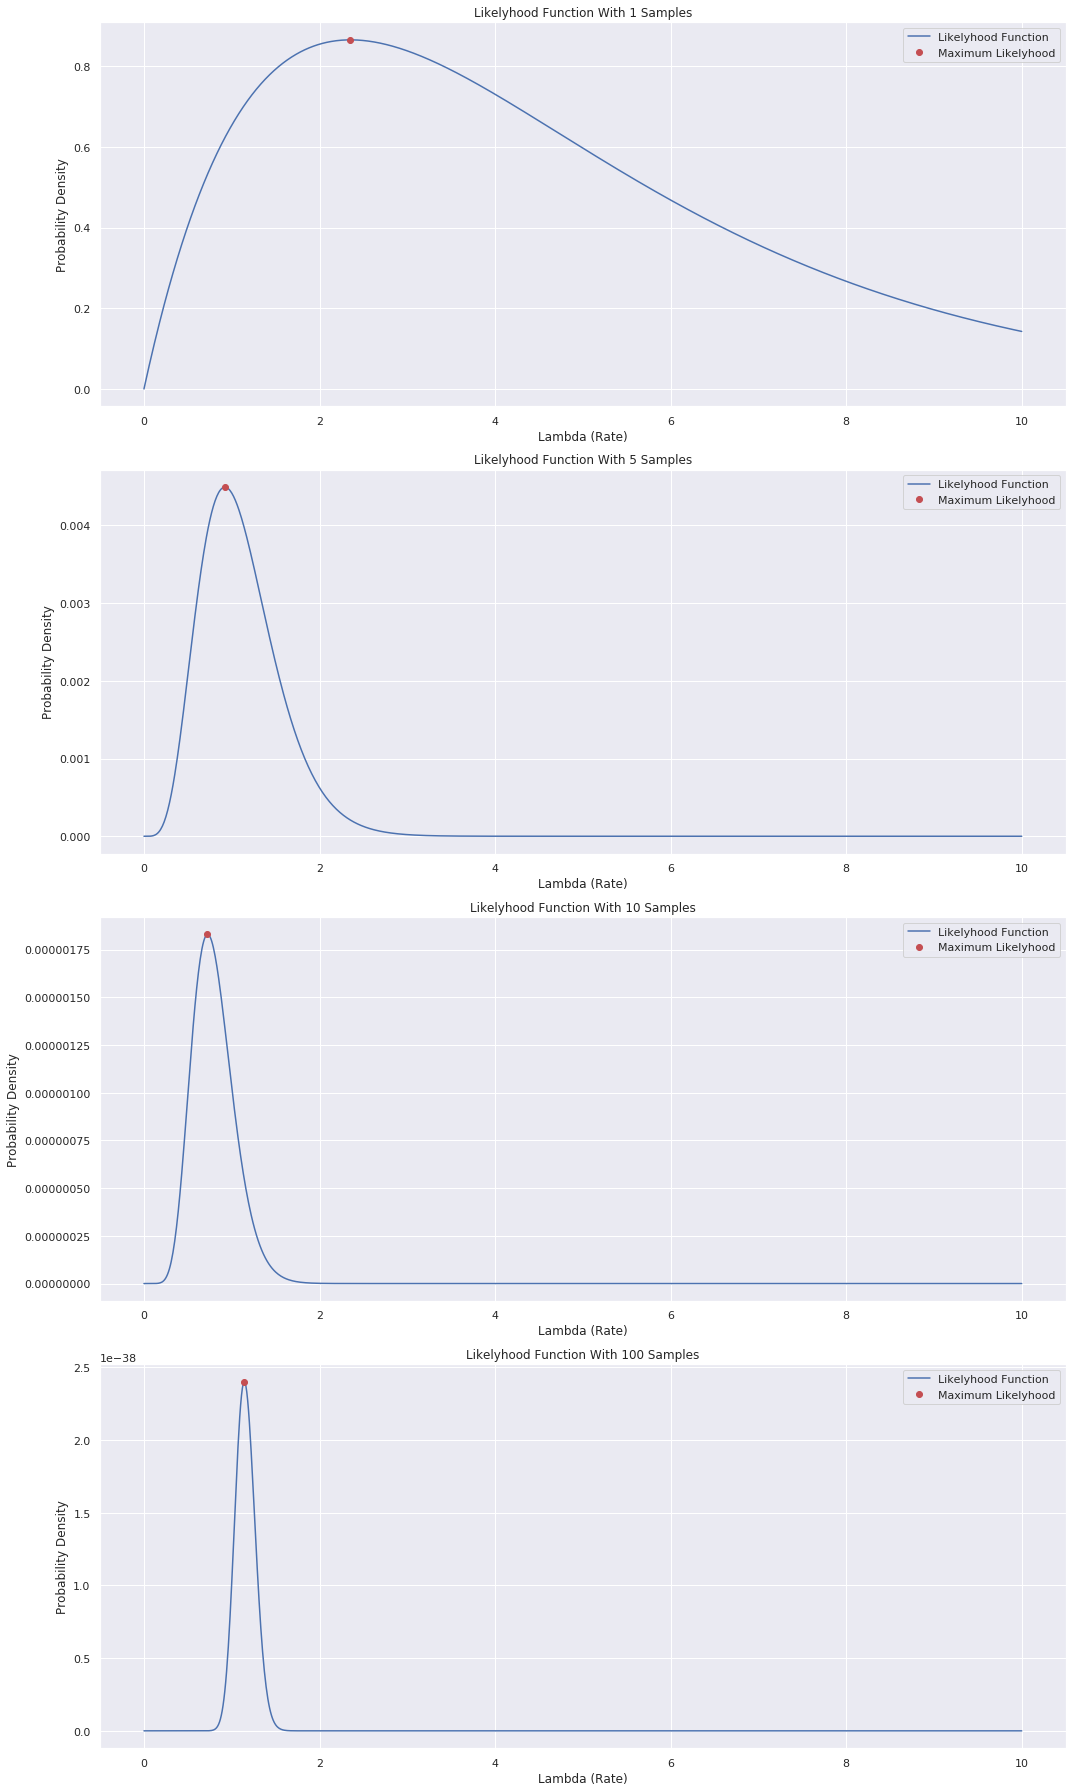

In [11]:
sample_vec = np.array([1, 5, 10, 100])
lambs = np.linspace(0, 10, 1000)

def like_func(lamb, x):
    s = np.sum(x)

    arg = np.exp(-lamb*s)
    
    lambdas = lamb**len(x)
    
    return np.multiply(lambdas, arg)

fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize=(15,25))

i=0
for samples in sample_vec:
    x = rnd.exponential(1, samples) #Draw samples many samples from exp(1)

    likes = like_func(lambs, x)
    ax[i].plot(lambs, likes)
    
    ymax = np.amax(likes)
    idx = np.where(likes == ymax)
    xmax = lambs[idx]
    ax[i].plot(xmax, ymax, 'ro')
    
    ax[i].set_title('Likelyhood Function With ' + str(samples) + ' Samples')
    ax[i].set_xlabel('Lambda (Rate)')
    ax[i].set_ylabel('Probability Density')
    ax[i].legend(['Likelyhood Function','Maximum Likelyhood'])
    
    i+=1
    
plt.tight_layout()

In the plots above we increase the number of samples of exponential random variables (the random variable that describes Poisson Process spike interval times) to inform our Bayesian lieklyhood function. We see that as we add more and more samples we become more certain that the rate is the true rate of $\lambda=1$. If we added even more samples we would be almost guranteed that was the correct value.